In [ ]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.style.use('ggplot')

#CARGADO DE DATOS

In [ ]:
artists_billboard=pd.read_csv('Artists_Billboard.csv',sep=',',encoding='latin1')


columnas y filas

In [ ]:
artists_billboard.shape

(635, 11)

In [ ]:
artists_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              635 non-null    int64  
 1   title           635 non-null    object 
 2   artist          635 non-null    object 
 3   mood            635 non-null    object 
 4   tempo           635 non-null    object 
 5   genre           635 non-null    object 
 6   artist_type     635 non-null    object 
 7   chart_date      635 non-null    int64  
 8   durationSeg     635 non-null    float64
 9   top             635 non-null    int64  
 10  anioNacimiento  635 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 54.7+ KB


In [ ]:
artists_billboard.head(3)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0


In [ ]:
artists_billboard.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


#CUANTOS ALCANZARON EL NUMERO 1 SEGUN TOP?

In [ ]:
#Divide(artists_billboard) en grupos según ranking ('top').
#Cuenta: Luego, cuenta cuántos artistas hay en cada grupo (.size()).
#size para grupos, count para columnas objetos
artists_billboard.groupby('top').size()

,0
top,
0,494
1,141


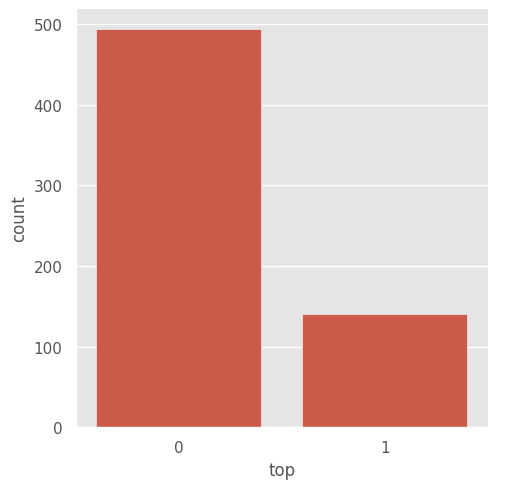

In [ ]:
sns.catplot(x='top',kind='count',data=artists_billboard)

la mayor parte son del top 0 o top 100 atras

In [ ]:
artists_billboard.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


durationSeg tiene valores atipicos, donde la medio y cuartiles no cuadran

<Axes: xlabel='artist_type', ylabel='durationSeg'>

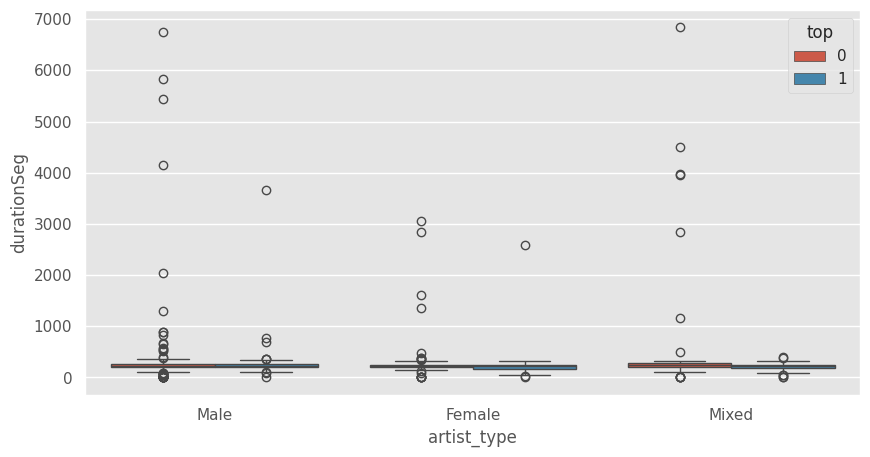

In [ ]:
# Evaluacion de valores atipicos
plt.figure(figsize=(10,5))
sns.boxplot(x='artist_type',y='durationSeg',hue='top',data=artists_billboard)

hay muchos outliers, se tiene que eliminar

Este código define una función llamada outlier_capping
que tiene como objetivo
controlar los valores atípicos
 en un conjunto de datos. Utiliza una técnica llamada
 "capping" (limitación).

In [ ]:
#reducir los outliners
def outlier_capping(x):
  x=x.clip(upper=x.quantile(0.95))
  return(x)

In [ ]:
artists_billboard_tratamiento=artists_billboard[['durationSeg']].apply(lambda x: outlier_capping(x))

In [ ]:
artists_billboard_tratamiento.head(3)

,durationSeg
0,191.0
1,368.0
2,223.0


 Imagina que tienes una tabla con información de artistas. La columna durationSeg tiene datos problemáticos. Esta línea de código la quita, la arregla y la vuelve a poner en la tabla, pero con los datos ya corregidos.

El resultado es una nueva tabla llamada artists_billboard_tratamiento con la columna durationSeg ya limpia y lista para ser usada.

In [ ]:
artists_billboard=pd.concat([artists_billboard.drop(columns=['durationSeg']),artists_billboard_tratamiento],axis=1,)

In [ ]:
artists_billboard.head(3)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0


In [ ]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,0.222047,1548.590551,227.240630
std,183.452991,2.617996e+04,0.415950,820.470454,84.984158
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,0.000000,1969.000000,200.000000
50%,317.000000,2.014051e+07,0.000000,1981.000000,232.000000
75%,475.500000,2.014101e+07,0.000000,1986.000000,266.500000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000


<Axes: xlabel='artist_type', ylabel='durationSeg'>

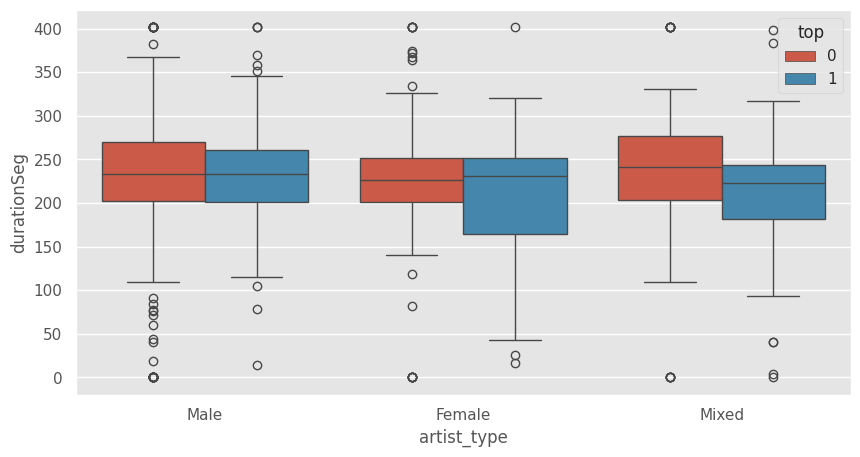

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='artist_type',y='durationSeg',hue='top',data=artists_billboard)

<Axes: xlabel='genre', ylabel='durationSeg'>

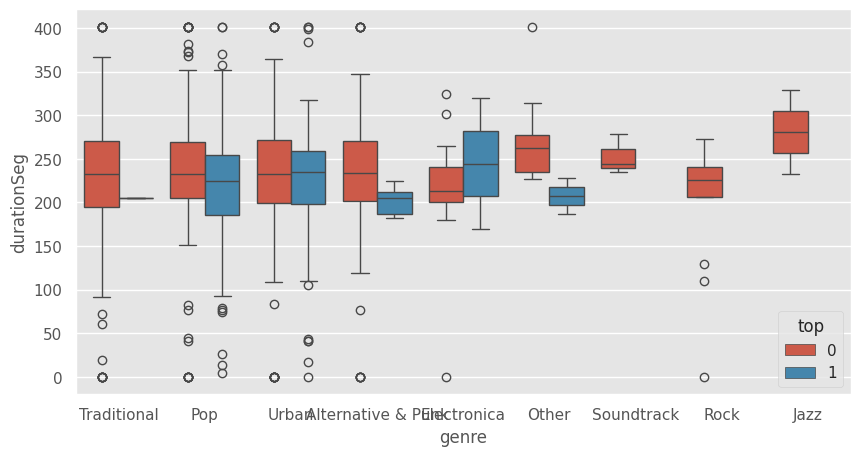

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='genre',y='durationSeg',hue='top',data=artists_billboard)

<Axes: xlabel='mood', ylabel='durationSeg'>

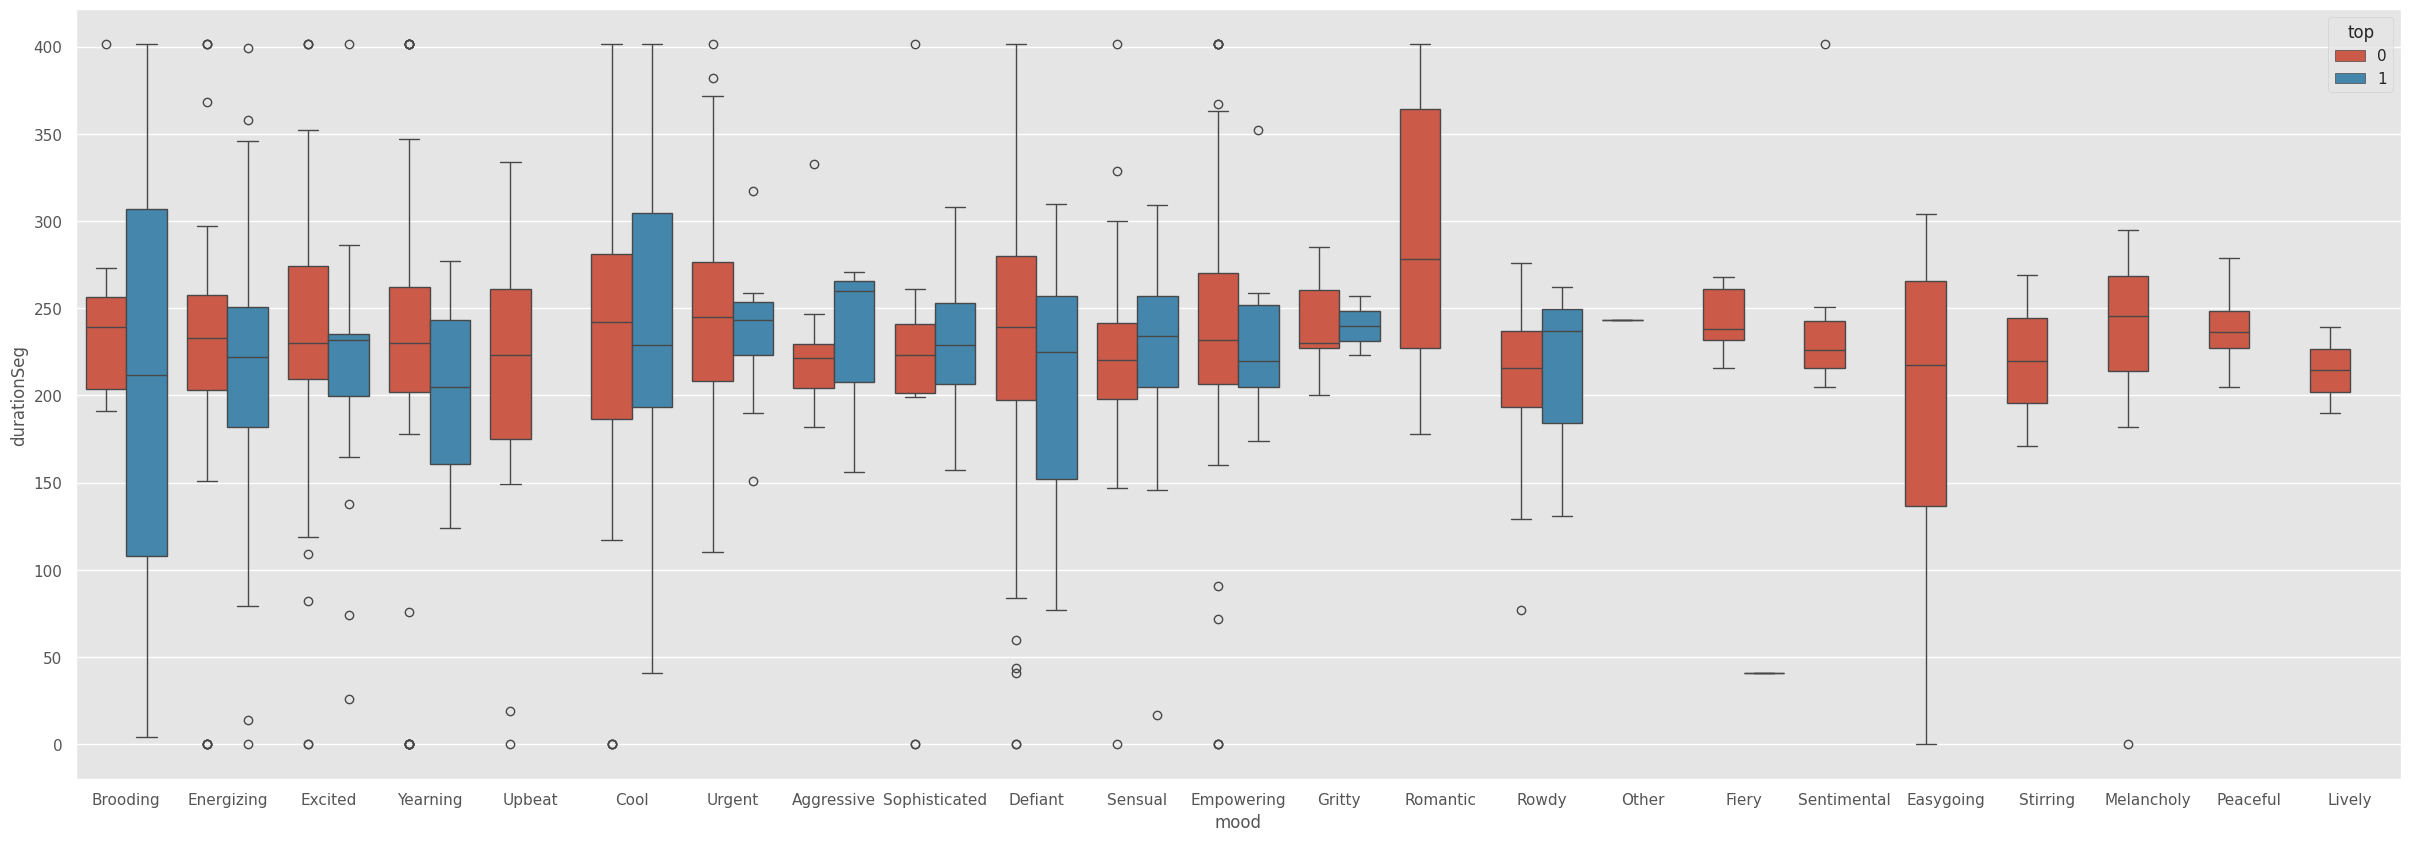

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(x='mood',y='durationSeg',hue='top',data=artists_billboard)

# VISUALIzACION DE LOS A:OS DE NACIMIENTO DE LOS ARTISTAS

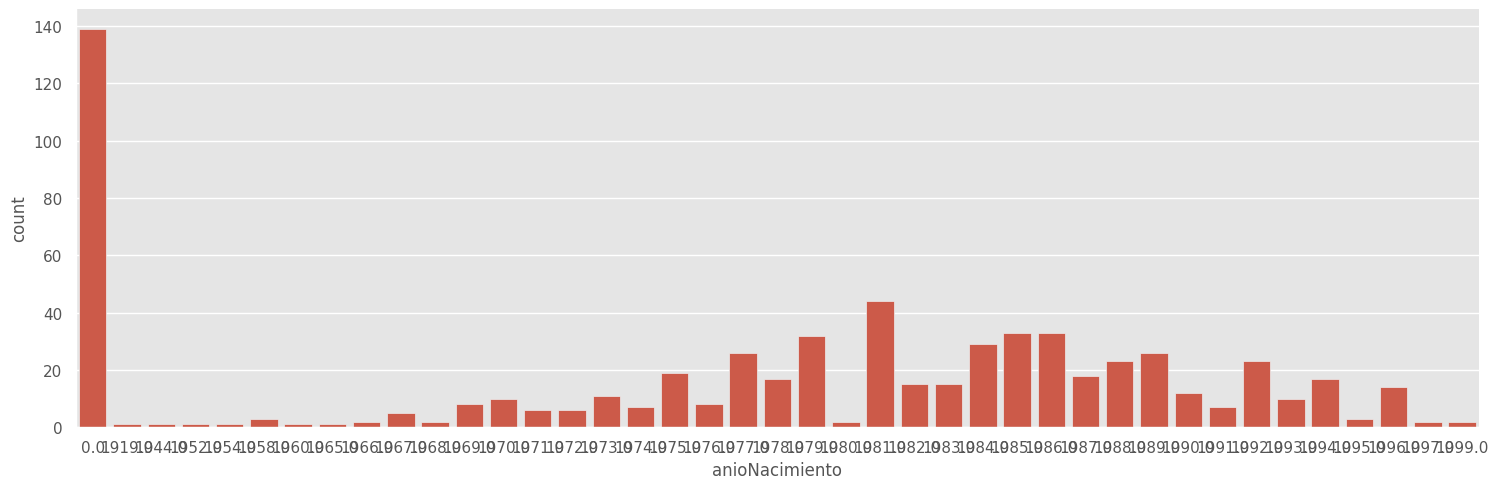

In [ ]:
sns.catplot(x='anioNacimiento',data=artists_billboard,kind='count',aspect=3)

**CALCULO EDAD PROMEDIO DE EDAD Y ASGINAR A REGISTRO NULL**

In [ ]:
def calculo_edad(anio,cuando):
  cad=str(cuando)
  momento=cad[0:4]
  if anio==0.0:
    return None
  return int(momento)-anio

In [ ]:
artists_billboard['edad']=artists_billboard.apply(lambda x: calculo_edad(x['anioNacimiento'],x['chart_date']),axis=1);

In [ ]:
def edad_fix(anio):
  if anio==0:
    return None
  return anio
artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']),axis=1);

In [ ]:
age_avg=artists_billboard['edad'].mean()
age_std=artists_billboard['edad'].std()
age_null_count=artists_billboard['edad'].isnull().sum()
age_null_random_list=np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_count)

conValores=np.isnan(artists_billboard['edad'])
artists_billboard.loc[(conValores),'edad']=age_null_random_list
artists_billboard['edad']=artists_billboard['edad'].astype(int)
print("edad promedio: "+str(age_avg))
print("edad desvio estandar: "+str(age_std))
print('intervalo de edad aleatorio:  ' +str(int(age_avg-age_std))+ 'a ' +str(int(age_avg+age_std)))

edad promedio: 30.10282258064516
edad desvio estandar: 8.40078832861513
intervalo de edad aleatorio:  21a 38


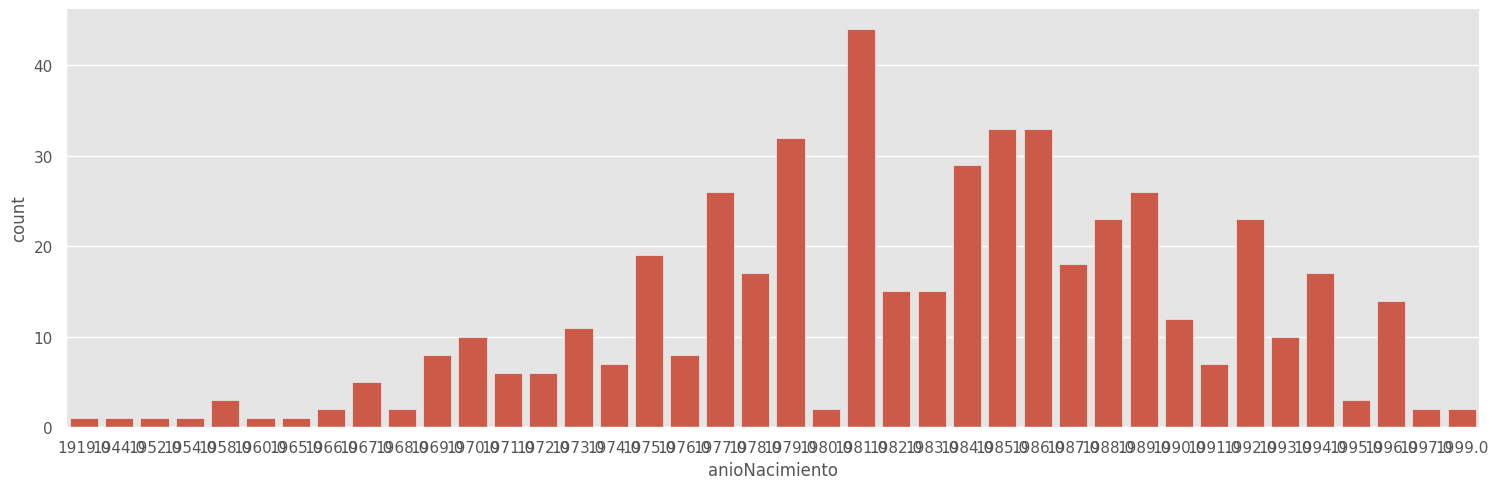

In [ ]:
sns.catplot(x='anioNacimiento',data=artists_billboard,kind='count',aspect=3)

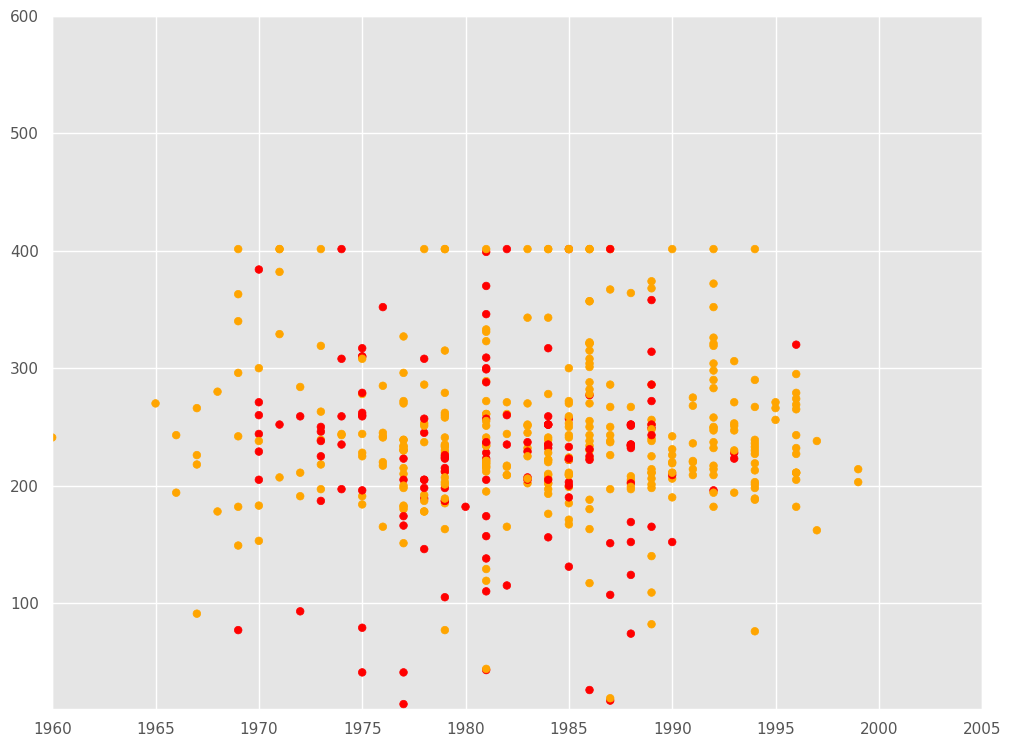

In [ ]:
#COMPARACION DE TOP Y NO TOP
colores=['orange','red']
tamanios=[60,40]

f1=artists_billboard['anioNacimiento'].values
f2=artists_billboard['durationSeg'].values

asignar=[]
for index, row in artists_billboard.iterrows():
  asignar.append(colores[row['top']])
plt.scatter(f1,f2,c=asignar,s=30)
plt.axis([1960,2005,10,600])
plt.show()

trafico que nos dice que no hay relacion

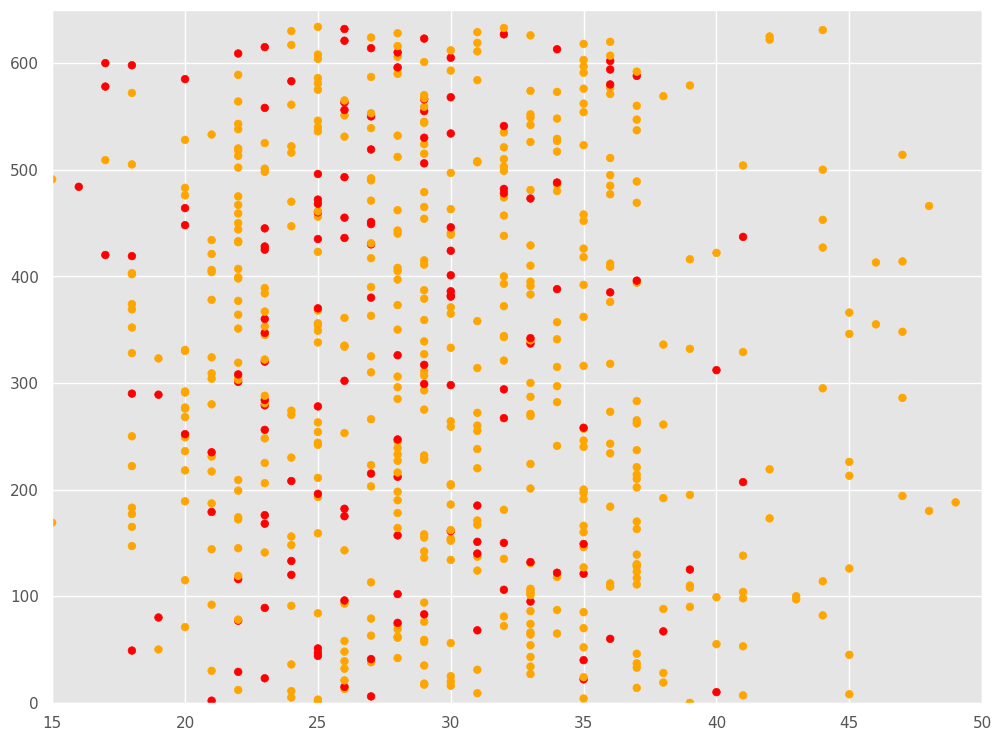

In [ ]:
colores=['orange','red','green']
tamanios=[60,40]

f1=artists_billboard['edad'].values
f2=artists_billboard.index

asignar=[]
for index, row in artists_billboard.iterrows():
  asignar.append(colores[row['top']])
plt.scatter(f1,f2,c=asignar,s=30)
plt.axis([15,50,0,650])
plt.show()

distr aleatoria no util

In [ ]:
artists_billboard.head(3)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,edad
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0,39
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0,25
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0,21


<Axes: xlabel='artist_type', ylabel='edad'>

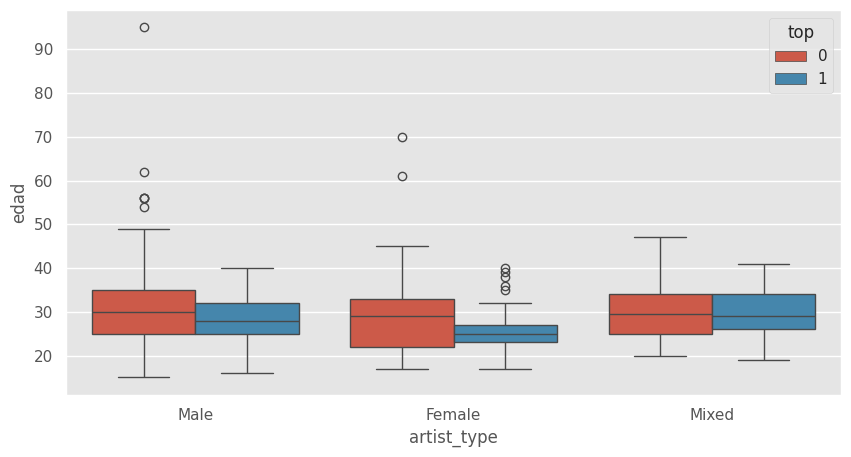

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='artist_type',y='edad',hue='top',data=artists_billboard)

,count
artist_type,
Female,153
Male,387
Mixed,95


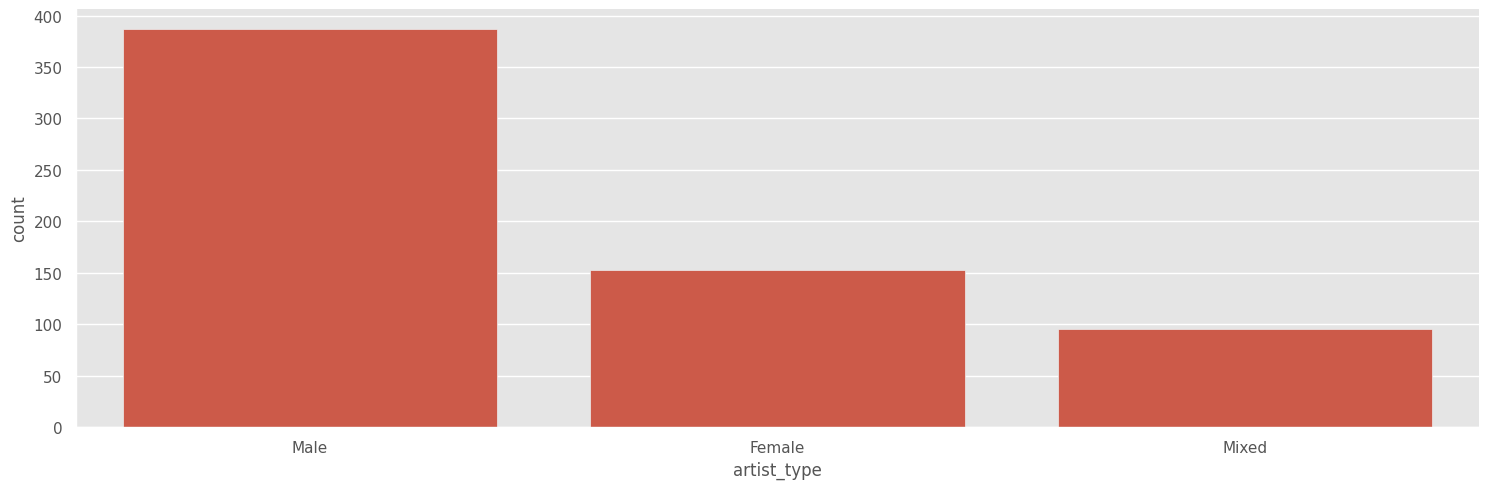

In [ ]:
sns.catplot(x='artist_type',data=artists_billboard,kind='count',aspect=3)
artists_billboard['artist_type'].value_counts().sort_index() # Add parentheses to call value_counts

artist_type   top              
              count      mean sum
0      Female   153  0.320261  49
1        Male   387  0.162791  63
2       Mixed    95  0.305263  29

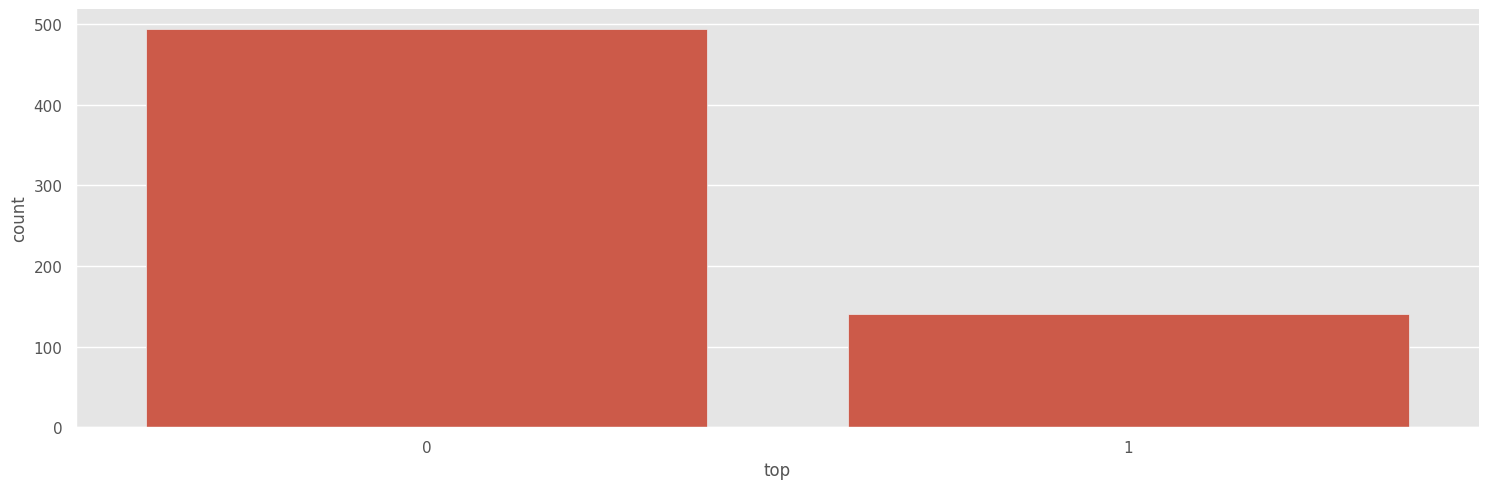

In [ ]:
sns.catplot(x='top',data=artists_billboard,kind='count',aspect=3)
artists_billboard[['artist_type','top']].groupby(['artist_type'],as_index=False).agg(['count','mean','sum'])


top y no top por sexo

mood   top              
                  count      mean sum
0      Aggressive    11  0.272727   3
1        Brooding    14  0.214286   3
2            Cool    78  0.346154  27
3         Defiant    64  0.078125   5
4       Easygoing     4  0.000000   0
5      Empowering    88  0.113636  10
6      Energizing    71  0.464789  33
7         Excited    62  0.306452  19
8           Fiery     6  0.166667   1
9          Gritty     9  0.222222   2
10         Lively     2  0.000000   0
11     Melancholy    10  0.000000   0
12          Other     1  0.000000   0
13       Peaceful     4  0.000000   0
14       Romantic     7  0.000000   0
15          Rowdy    15  0.200000   3
16        Sensual    55  0.309091  17
17    Sentimental     7  0.000000   0
18  Sophisticated    15  0.266667   4
19       Stirring     2  0.000000   0
20         Upbeat    12  0.000000   0
21         Urgent    30  0.266667   8
22       Yearning    68  0.088235   6

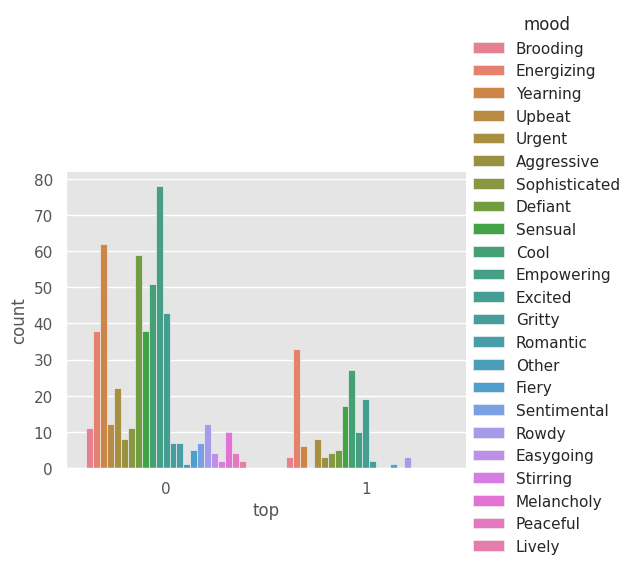

In [ ]:
sns.catplot(x='top',data=artists_billboard,hue='mood',kind='count')
artists_billboard[['mood','top']].groupby(['mood'],as_index=False).agg(['count','mean','sum'])

tempo   top               
                count      mean  sum
0    Fast Tempo    53  0.226415   12
1  Medium Tempo   517  0.218569  113
2    Slow Tempo    65  0.246154   16

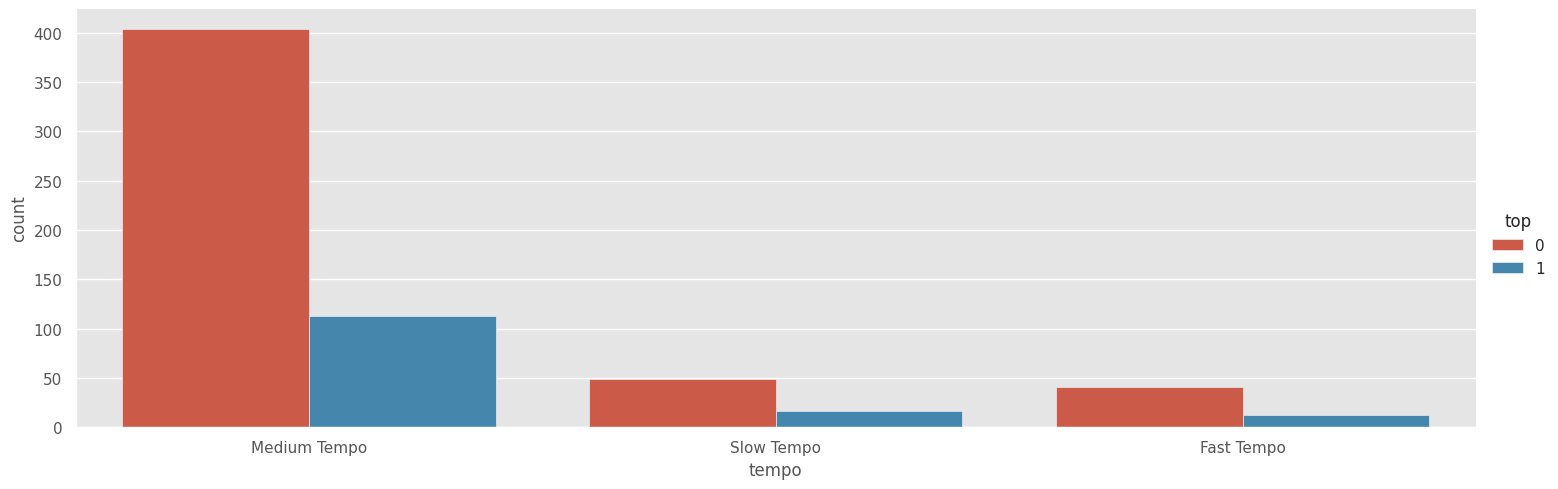

In [ ]:
sns.catplot(x='tempo',data=artists_billboard,kind='count',hue='top',aspect=3)
artists_billboard[['tempo','top']].groupby(['tempo'],as_index=False).agg(['count','mean','sum'])